In [154]:
import numpy as np
import dlc_bci as bci
import pandas as pd
from functools import reduce
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
N_CHA = 28
N_SAMPLES = 50

In [35]:
train_input, train_target = bci.load(root = './data_bci')
X = train_input.numpy()
y = train_target.numpy()

X_1 = X[y==1]
X_0 = X[y==0]

# Channels and samples relation

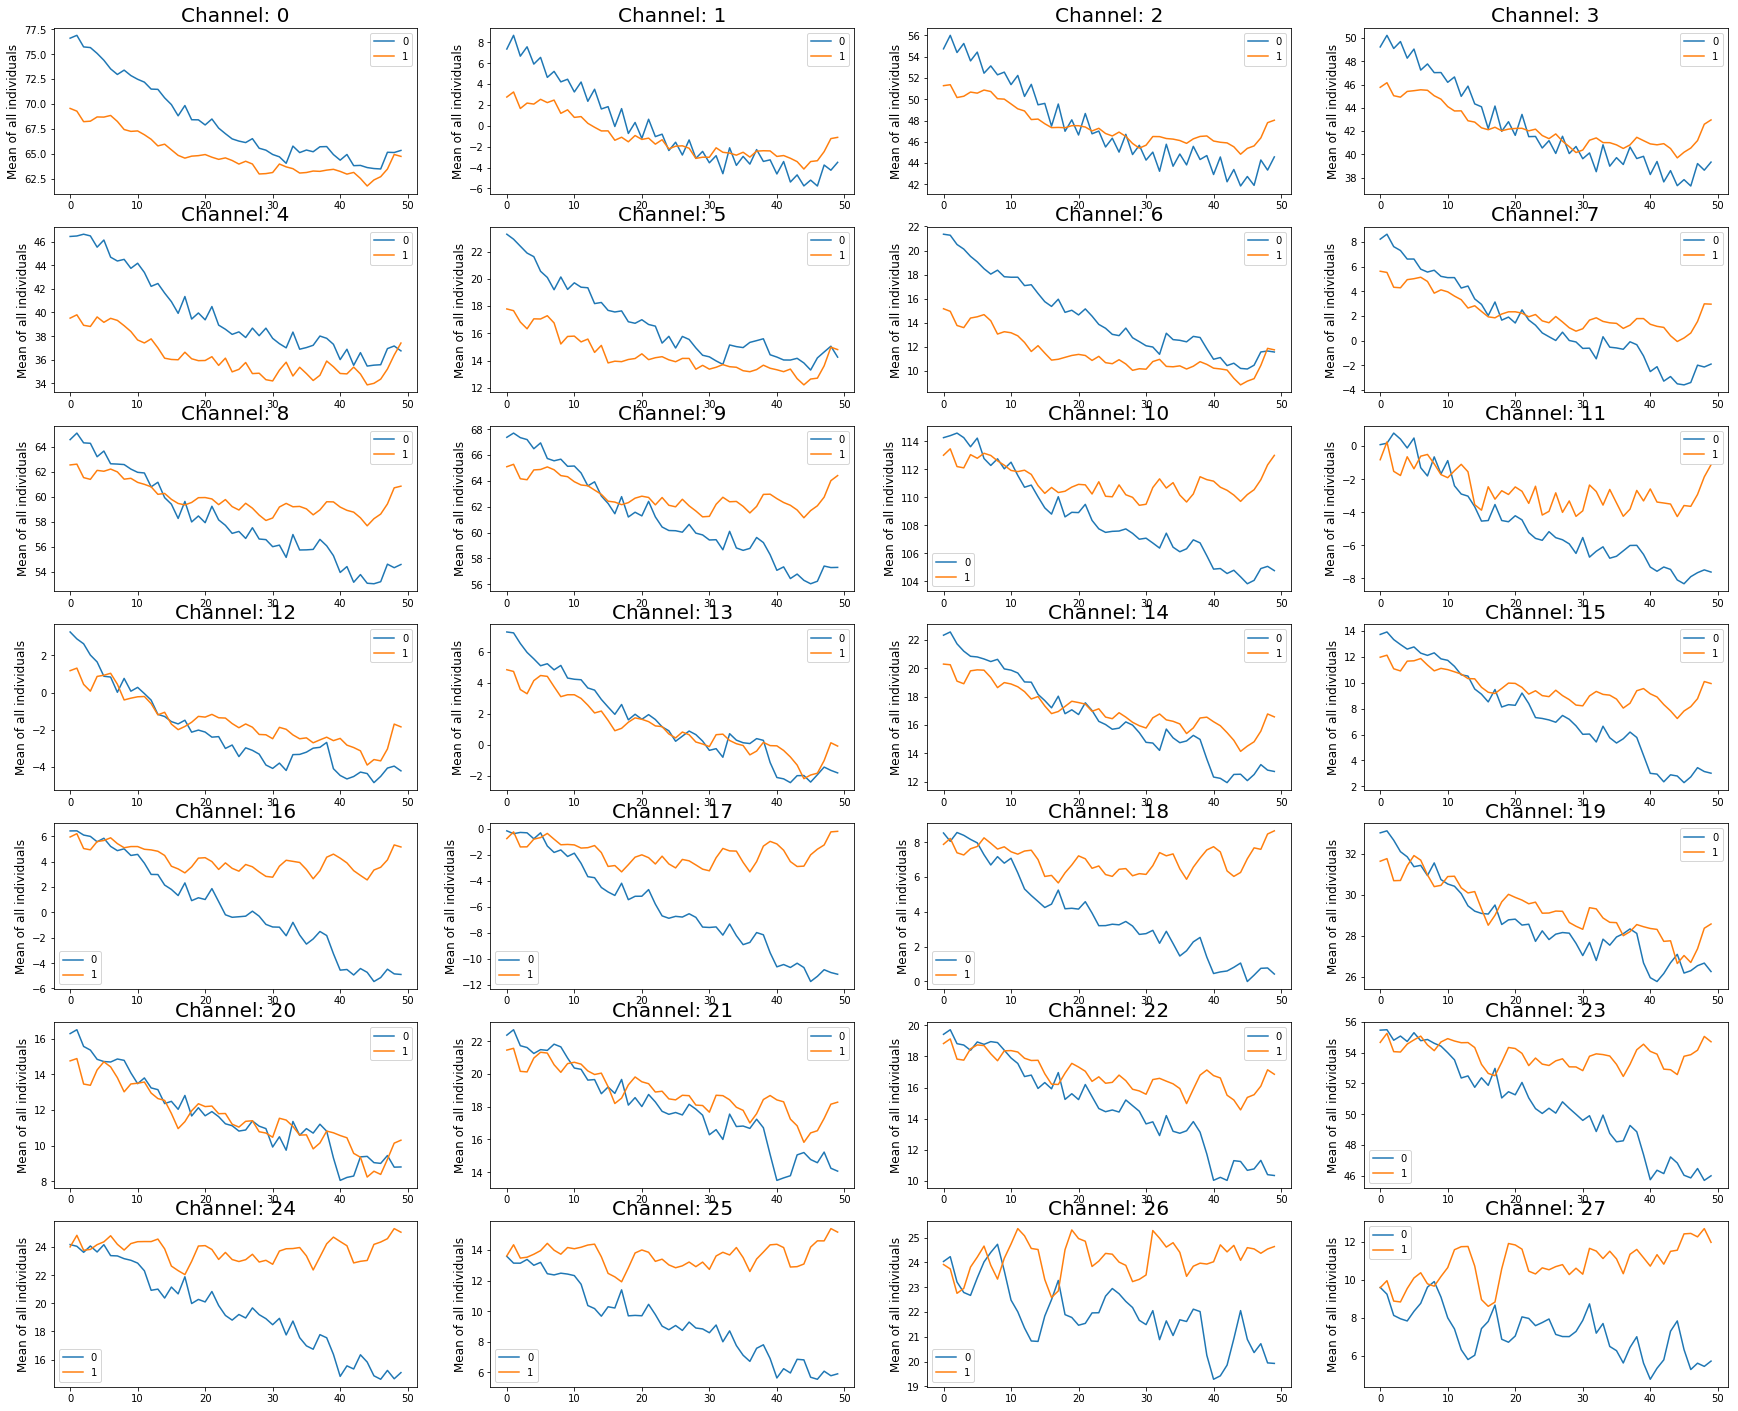

In [212]:
f, ax = plt.subplots(7, 4, figsize=(30, 25))
positions = np.array(range(28)).reshape(7, 4)

for c in range(N_CHA):
    means_1 = list(X_1[:, c, :].mean(0))
    means_0 = list(X_0[:, c, :].mean(0))
    
    pos = np.where(positions==c)
    ax[pos]
    ax[pos[0][0], pos[1][0]].plot(list(zip(means_0, means_1)))
    ax[pos[0][0], pos[1][0]].set_title('Channel: {}'.format(c), fontsize=20)
#     ax[pos[0][0], pos[1][0]].set_xlabel('Samples')
    ax[pos[0][0], pos[1][0]].legend([0, 1])
    ax[pos[0][0], pos[1][0]].set_ylabel('Mean of all individuals', fontsize=12)

# Variance Analysis of channels

In [ ]:
means = []
means_1 = []
means_0 = []
for i in range(X_1.shape[0]):
    corr = pd.DataFrame([list(a) for a in list(X_1[i])]).T.corr(method='spearman')
    corrs_1.append(corr.as_matrix())
    corrs.append(corr.as_matrix())
for i in range(X_0.shape[0]):
    corr = pd.DataFrame([list(a) for a in list(X_0[i])]).T.corr(method='spearman')
    corrs_0.append(corr.as_matrix())
    corrs.append(corr.as_matrix())
    
mean_1 = reduce(lambda x,y: x+y, corrs_1) / X_1.shape[0]
mean_0 = reduce(lambda x,y: x+y, corrs_0) / X_0.shape[0]
all_corr = reduce(lambda x,y: x+y, corrs) / (X_1.shape[0] + X_0.shape[0])

# How are the most correlated channels?
The correlation coeficient used was `spearman` because it can capture non-linear relation among channels because it's based on the ranking / concordance among features.

In [146]:
corrs = []
corrs_1 = []
corrs_0 = []
for i in range(X_1.shape[0]):
    corr = pd.DataFrame([list(a) for a in list(X_1[i])]).T.corr(method='spearman')
    corrs_1.append(corr.as_matrix())
    corrs.append(corr.as_matrix())
for i in range(X_0.shape[0]):
    corr = pd.DataFrame([list(a) for a in list(X_0[i])]).T.corr(method='spearman')
    corrs_0.append(corr.as_matrix())
    corrs.append(corr.as_matrix())
    
corr_1 = reduce(lambda x,y: x+y, corrs_1) / X_1.shape[0]
corr_0 = reduce(lambda x,y: x+y, corrs_0) / X_0.shape[0]
all_corr = reduce(lambda x,y: x+y, corrs) / (X_1.shape[0] + X_0.shape[0])

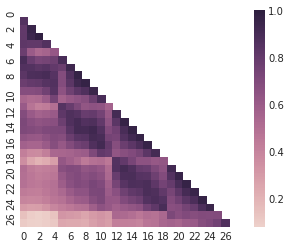

In [217]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(all_corr, mask=mask, square=True, 
                     cmap=sns.cubehelix_palette(as_cmap=True, reverse=False))

None of them are negative correlated, it means that all of them point to the same direction.
Channels dennoted by far numbers, are less correlated that the closest ones.

# What are the relations that most change for `right` and `left`?
For `right` and `left` we have a matrix of correlation among channels and the variation is given by subtracting those correlations matrix 

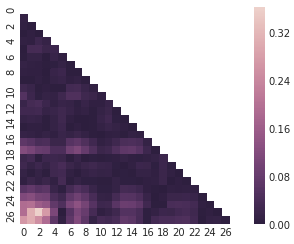

In [219]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(np.abs(corr_0-corr_1) / (corr_1), mask=mask, square=True, 
                     cmap = sns.cubehelix_palette(as_cmap=True, reverse=True))

In [233]:
a = np.array([1.2,2,3]).astype(int)

In [237]:
a = [x.item() for x in np.array([1.2,2,3]).astype(int)]

In [238]:
type(a[0])

int